# Business Understanding 
## Business problem: 
My company is expanding in to new industries to diversify its portfolio. They are interested in purchasing and operating airplanes for commercial and private enterprises, I am charged to determine anything about the potential risks of aircraft. I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.I am must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.
## Project objectives: 
### Main objective
To help decide which aircraft to purchase and operate airplanes for commercial and private enterprises.
### Specific objectives
<ul>
    <li>To find correlation and visualize between </li>
    <ol>
    <li>make and mode and their risks</li> 
    <li>the type of aircraft category and their risks.</li> 
    <li>The type of engine and no of engines and their risks..</li> 
    </ol>
</ul>


# Data Understanding 
## Data collection
[Data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) was collected from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

In [1]:
#importing libraries for data manipulation (pandas, numpy) and visualization (seaborn, matplotlib)
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# set the maximum number of columns to 40 to display all columns
pd.set_option('display.max_columns', 40)

## Reading Files
Using pandas and load using <pre> ntsb_df = pd.read_csv('AviationData.csv', encoding='latin1')</pre>
Then describing ntsb_df

In [3]:
#load National Transportation Safety Board(ntsb) dataset to ntsb_df
#set encoding to latin1 to handle encoding error
ntsb_df = pd.read_csv('AviationData.csv', encoding='latin1')

C:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#getting top 5 rows
ntsb_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#getting bottom 5 rows
ntsb_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
#getting sample 5 rows
ntsb_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
#checking data info
ntsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
#describing numerical columns
ntsb_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
#describing numerical columns
ntsb_df.describe(include='O')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50249,52790,87889,85695,32287,87572,88826,88797,88787,81812,32023,12582,82697,16648,84397,61724,82508,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10375,24871,109,4,15,79105,8237,12318,2,13,31,3,26,13590,4,12,17075,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


In [10]:
# Checking shape of ntsb_df
ntsb_df.shape

(88889, 31)

In [11]:
#filtering top 30 Make
Make_df = ntsb_df.Make.value_counts().reset_index().iloc[:10] 
ntsb_df = ntsb_df[ntsb_df.Make.isin(Make_df['index'])]

In [12]:
ntsb_df.shape

(53414, 31)

# Data Preparation
## Cleaning
<ol>
    <li>Changing Columns Data Types and/or Values</li>
    <li>Filling Missing Values</li>
    <li>Checking for Outliers</li>
    <li>Checking duplicates</li>
</ol>

In [13]:
ntsb_df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [14]:
#Changing columns name by replace . with _ and lowercasing
ntsb_df.columns = ntsb_df.columns.str.lower()
ntsb_df.columns = ntsb_df.columns.str.replace(".","_")
ntsb_df.columns

C:\Users\Mich\AppData\Local\Temp/ipykernel_31068/257064276.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  ntsb_df.columns = ntsb_df.columns.str.replace(".","_")


Index(['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country', 'latitude', 'longitude', 'airport_code',
       'airport_name', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description',
       'schedule', 'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'report_status',
       'publication_date'],
      dtype='object')

In [15]:
#checking columns
for col in ntsb_df.columns:
    #unique values and no of unique values
    unique_val = str(ntsb_df[col].unique())
    no_unique_val = str(ntsb_df[col].nunique())
    
    print(col + " | No of unique = "+ no_unique_val +"\n" +unique_val+"\n")

event_id | No of unique = 52978
['20001218X45447' '20061025X01555' '20041105X01764' ... '20221227106491'
 '20221227106498' '20221230106513']

investigation_type | No of unique = 2
['Accident' 'Incident']

accident_number | No of unique = 53406
['LAX94LA336' 'NYC07LA005' 'CHI79FA064' ... 'ERA23LA093' 'WPR23LA076'
 'ERA23LA097']

event_date | No of unique = 13807
['1962-07-19' '1974-08-30' '1979-08-02' ... '2022-12-21' '2022-12-26'
 '2022-12-29']

location | No of unique = 19028
['BRIDGEPORT, CA' 'Saltville, VA' 'Canton, OH' ...
 'Happy Valley-Goose Bay, OF' 'San Manual, AZ' 'Auburn Hills, MI']

country | No of unique = 195
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Germany'
 'Korea, Republic Of' 'Martinique' 'PACIFIC OCEAN' 'Bolivia' 'Mexico'
 'Dominica' 'Netherlands Antilles' 'Iceland' 'Greece' 'Guam' 'Australia'
 'CARIBBEAN SEA' 'West Indies' 'Japan' 'Canada' 'Philippines' 'Venezuela'
 'Colombia' 'United Kingdom'

In [16]:
#Fixing values which are written in different cases
for col in set(ntsb_df.select_dtypes(include = ['O'])):
    #original values contained within a column
    org_unique_val = set(ntsb_df[col].unique())
    no_org_unique_val = ntsb_df[col].nunique()
    
    if col in ['location','engine_type','make','model','airport_name','air_carrier']:
        ntsb_df[col] = ntsb_df[col].str.title()
    elif col in ['weather_condition','airport_code','longitude','registration_number']:
        ntsb_df[col] = ntsb_df[col].str.upper()
        
    #Values contained within a column after formatting(capitalizing/titling)
    no_fmr_unique_val =  ntsb_df[col].nunique()
    
    #check the value of difference before any computation
    diff = no_org_unique_val - no_fmr_unique_val
    
    if diff > 0:
        fmr_unique_val =  set(ntsb_df[col].unique())
        #difference btw values
        print(col+"\n No of similar values " + str(no_org_unique_val- no_fmr_unique_val))
        #to check the similar values 
        print( "Sample Values\n"+str(list(org_unique_val - fmr_unique_val)[:15]))
    

airport_name
 No of similar values 1985
Sample Values
['WEBSTER', 'AERO ACRES', 'BLOWING ROCK', 'MANHATTAN MUNICIPAL', 'ISLEBORO', 'SALEM-LECKRONE', 'CHEFORNAK', 'NEW BEDFORD REGIONAL APT.', 'HASTON RANCH', 'SCOTTSDALE MUNI', "Bolingbrook's Clow Int'l", 'TALKEETNA VILLAGE STRIP', 'KTSAP', 'GOODNEWS', 'SCHAUMBURG']
registration_number
 No of similar values 7
Sample Values
['N5929t', 'N5759t', 'N738Ej', 'Ex-009', 'N29cf', 'N2242r', 'N2995v', 'Vh-XMO', 'unknown', 'N5464n', 'N7821k', 'None', 'none', 'N9133m', 'N4418c']
weather_condition
 No of similar values 1
Sample Values
['Unk']
air_carrier
 No of similar values 150
Sample Values
['Sierra Academy of Aeronautics', 'LORRING DAVID W', 'Ascent Aviation LLC', 'B & M Enterprises, Inc. (dba: New Mexico Flying Service)', 'Al Merrill (dba: Anuenue Aviation)', '9487W LLC', 'Exclusive Jets LLC', 'FRESQUEZ RONALD R', 'HANSON LYLE', 'Denver Air Center (dba: Skycab)', 'WARBELOWS AIR VENTURES INC', 'GARRISON RONALD L', 'CULWELL CHARLES W DBA', 'CARL W

In [17]:
#Checking if there is any similar values after the manipulation
total_diff = 0
for col in set(ntsb_df.select_dtypes(include = ['O'])):
    #original values contained within a column
    no_org_unique_val = ntsb_df[col].nunique()
    
    if col in ['Location','Engine.Type','Make','Airport.Name','Air.carrier']:
        ntsb_df[col] = ntsb_df[col].str.title()
    elif col in ['Weather.Condition','Airport.Code','Longitude','Registration.Number']:
        ntsb_df[col] = ntsb_df[col].str.upper()
        
    #Values contained within a column after formatting(capitalizing/titling) 
    no_fmr_unique_val =  ntsb_df[col].nunique()
    
    #check the value of difference before any computation
    diff = no_org_unique_val - no_fmr_unique_val
    
    total_diff+=diff
    
print("Similar values = "+str(total_diff))

Similar values = 0


In [18]:
#checking missing values
ntsb_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                     37
country                     155
latitude                  36741
longitude                 36746
airport_code              22176
airport_name              20463
injury_severity             581
aircraft_damage            1595
aircraft_category         37533
registration_number         819
make                          0
model                        12
amateur_built                65
number_of_engines          2726
engine_type                3198
far_description           37631
schedule                  46330
purpose_of_flight          3167
air_carrier               45462
total_fatal_injuries       6706
total_serious_injuries     7519
total_minor_injuries       7136
total_uninjured            3280
weather_condition          2287
broad_phase_of_flight     12484
report_status              2993
publication_date           9532
dtype: i

In [19]:
#checking injury_severity
ntsb_df['injury_severity'].unique()

array(['Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal', 'Fatal(2)',
       'Incident', 'Fatal(8)', 'Fatal(78)', 'Fatal(6)', 'Fatal(5)',
       'Fatal(7)', 'Fatal(153)', 'Fatal(14)', 'Fatal(10)', 'Fatal(17)',
       'Fatal(29)', 'Fatal(9)', 'Unavailable', 'Fatal(25)', 'Fatal(82)',
       'Fatal(18)', 'Fatal(270)', 'Fatal(144)', 'Fatal(11)', 'Fatal(131)',
       'Fatal(73)', 'Fatal(34)', 'Fatal(13)', 'Fatal(47)', 'Fatal(12)',
       'Fatal(132)', 'Fatal(54)', 'Fatal(65)', 'Fatal(72)', 'Fatal(20)',
       'Fatal(160)', 'Fatal(189)', 'Fatal(123)', 'Fatal(33)',
       'Fatal(230)', 'Fatal(70)', 'Fatal(349)', 'Fatal(125)', 'Fatal(35)',
       'Fatal(228)', 'Fatal(97)', 'Fatal(52)', 'Fatal(87)', 'Fatal(15)',
       'Fatal(16)', 'Fatal(80)', 'Fatal(217)', 'Fatal(60)', 'Fatal(83)',
       'Fatal(44)', 'Fatal(64)', 'Fatal(92)', 'Fatal(118)', 'Fatal(138)',
       'Fatal(206)', 'Fatal(71)', 'Fatal(23)', 'Fatal(21)', 'Fatal(102)',
       'Fatal(115)', 'Fatal(141)', 'Fatal(104)', 'Fatal(121)',
     

In [20]:
#changing Fatal(x) injury_severity to Fatal
ntsb_df['injury_severity'] = ntsb_df['injury_severity'].map(lambda x: 'Fatal' if x  not in ['Incident','Fatal','Minor','Serious',np.nan] else x)
ntsb_df['injury_severity'].unique()

array(['Fatal', 'Incident', nan, 'Minor', 'Serious'], dtype=object)

In [21]:
#changing nan injury_severity to Unknown
ntsb_df['injury_severity'] = ntsb_df['injury_severity'].map(lambda x: 'Unknown' if x is np.nan else x)
ntsb_df['injury_severity'].unique()

array(['Fatal', 'Incident', 'Unknown', 'Minor', 'Serious'], dtype=object)

In [22]:
# Checking missing values before
print(ntsb_df['country'].isna().sum())

# Create location_make_df with unique combinations of 'country', 'location', 'make', and 'model'
location_make_df = ntsb_df[['country', 'location', 'make', 'model']].dropna(subset=['country']).drop_duplicates()

# First attempt: Update missing 'country' based on 'location'
ntsb_df['country'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        location_make_df['location'] == row['location'], 'country'].values[0]
    if pd.isna(row['country']) and row['location'] in location_make_df['location'].values
    else row['country'],
    axis=1
)

# Second attempt: Update missing 'country' based on 'make' and 'model' if 'location' doesn't match
def fill_country_based_on_make_model(row):
    if pd.isna(row['country']):
        matching_rows = location_make_df[
            (location_make_df['make'] == row['make']) & (location_make_df['model'] == row['model'])]
        
        if not matching_rows.empty:
            return matching_rows['country'].values[0]
        else:
            return row['country']
    return row['country']

ntsb_df['country'] = ntsb_df.apply(fill_country_based_on_make_model, axis=1)

# Checking missing values after
print(ntsb_df['country'].isna().sum())


155
4


In [23]:
# Checking missing values before
print(ntsb_df['location'].isna().sum())

# Create location_make_df with unique combinations of 'country', 'location', 'make', and 'model'
location_make_df = ntsb_df[['country', 'location', 'make', 'model']].dropna(subset=['location']).drop_duplicates()

# First attempt: Update missing 'location' based on 'country'
ntsb_df['location'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        location_make_df['country'] == row['country'], 'location'].values[0]
    if pd.isna(row['location']) and row['country'] in location_make_df['country'].values
    else row['location'],
    axis=1
)

# Second attempt: Update missing 'location' based on 'make' and 'model' if 'country' doesn't match
ntsb_df['location'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        (location_make_df['make'] == row['make']) & (location_make_df['model'] == row['model']), 'location'].values[0]
    if pd.isna(row['location']) and row['make'] in location_make_df['make'].values and row['model'] in location_make_df['model'].values
    else row['location'],
    axis=1
)

# Checking missing values after
print(ntsb_df['location'].isna().sum())


37
0


In [24]:
# Checking missing values before
print(ntsb_df[['make', 'model']].isna().sum())

# Create location_make_df with unique combinations of 'country', 'location', 'make', and 'model'
location_make_df = ntsb_df[['country', 'location', 'make', 'model']].dropna(subset=['make', 'model']).drop_duplicates()

# First attempt: Update missing 'make' based on 'country' and 'location'
ntsb_df['make'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        (location_make_df['country'] == row['country']) & (location_make_df['location'] == row['location']), 'make'].values[0]
    if pd.isna(row['make']) and row['country'] in location_make_df['country'].values and row['location'] in location_make_df['location'].values
    else row['make'],
    axis=1
)

# Second attempt: Update missing 'make' based on 'model' if 'country' and 'location' don't match
ntsb_df['make'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        (location_make_df['model'] == row['model']), 'make'].values[0]
    if pd.isna(row['make']) and row['model'] in location_make_df['model'].values
    else row['make'],
    axis=1
)

# Second attempt: Update missing 'model' based on 'make' and 'country' if 'model' doesn't match
def safe_fill_model(row):
    if pd.isna(row['model']):
        matching_rows = location_make_df[
            (location_make_df['make'] == row['make']) & (location_make_df['country'] == row['country'])]
        
        if not matching_rows.empty:
            return matching_rows['model'].values[0]
        else:
            return row['model']  # If no match found, return the original model (NaN)
    return row['model']

ntsb_df['model'] = ntsb_df.apply(safe_fill_model, axis=1)

# Checking missing values after
print(ntsb_df[['make', 'model']].isna().sum())


make      0
model    12
dtype: int64
make     0
model    1
dtype: int64


In [25]:
# Checking missing values before
print(ntsb_df['aircraft_category'].isna().sum())

# Create location_make_df with unique combinations of 'aircraft_category', 'location', 'make', and 'model'
location_make_df = ntsb_df[['aircraft_category', 'location', 'make', 'model']].dropna(subset=['aircraft_category']).drop_duplicates()

# First attempt: Update missing 'aircraft_category' based on 'location'
ntsb_df['aircraft_category'] = ntsb_df.apply(
    lambda row: location_make_df.loc[
        location_make_df['location'] == row['location'], 'aircraft_category'].values[0]
    if pd.isna(row['aircraft_category']) and row['location'] in location_make_df['location'].values
    else row['aircraft_category'],
    axis=1
)

# Second attempt: Update missing 'aircraft_category' based on 'make' and 'model' if 'location' doesn't match
def fill_aircraft_category_based_on_make_model(row):
    if pd.isna(row['aircraft_category']):
        matching_rows = location_make_df[
            (location_make_df['make'] == row['make']) & (location_make_df['model'] == row['model'])]
        
        if not matching_rows.empty:
            return matching_rows['aircraft_category'].values[0]
        else:
            return row['aircraft_category']
    return row['aircraft_category']

ntsb_df['aircraft_category'] = ntsb_df.apply(fill_aircraft_category_based_on_make_model, axis=1)

# Checking missing values after
print(ntsb_df['aircraft_category'].isna().sum())


37533
875


In [26]:
ntsb_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                      0
country                       4
latitude                  36741
longitude                 36746
airport_code              22176
airport_name              20463
injury_severity               0
aircraft_damage            1595
aircraft_category           875
registration_number         819
make                          0
model                         1
amateur_built                65
number_of_engines          2726
engine_type                3198
far_description           37631
schedule                  46330
purpose_of_flight          3167
air_carrier               45462
total_fatal_injuries       6706
total_serious_injuries     7519
total_minor_injuries       7136
total_uninjured            3280
weather_condition          2287
broad_phase_of_flight     12484
report_status              2993
publication_date           9532
dtype: i

In [27]:
#ntsb_df[['make','injury_severity']].value_counts().reset_index()

In [28]:
#ntsb_df[['country','location','make']].value_counts().reset_index().iloc[:15]

In [29]:
#drop all missing values
#ntsb_df.dropna(inplace=True)

## Feature Engineering

In [30]:
 #Adding year from event_date
ntsb_df['year'] = ntsb_df['event_date'].map(lambda x: x.split("-")[0].strip()) 
ntsb_df['year'].unique()[:50]

array(['1962', '1974', '1979', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'], dtype=object)

In [31]:
#Adding states 
states = pd.read_csv('USState_Codes.csv')

In [32]:
states.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [33]:
ntsb_df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,aircraft_damage,aircraft_category,registration_number,make,model,amateur_built,number_of_engines,engine_type,far_description,schedule,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,year
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"Bridgeport, Ca",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N5069P,Piper,Pa24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, Va",United States,36.922223,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, Oh",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"Cotton, Mn",United States,NaN,NaN,NaN,NaN,Fatal,Destroyed,Airplane,N4988E,Cessna,180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"Pullman, Wa",United States,NaN,NaN,NaN,Blackburn Ag Strip,Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982


In [34]:
 #Adding state from location
ntsb_df['state'] = ntsb_df['location'].map(lambda x: x.split(",")[-1].upper().strip())
ntsb_df['state'] = ntsb_df['state'].map(lambda x: states.loc[states['Abbreviation'] == x, 'US_State'].values[0] if x in states['Abbreviation'].values else x)
ntsb_df['state'].unique()[:50]

array(['California', 'Virginia', 'Ohio', 'Minnesota', 'Washington',
       'New Jersey', 'New Mexico', 'Alabama', 'Texas', 'Arkansas',
       'Alaska', 'Pennsylvania', 'Michigan', 'Georgia', 'Florida',
       'Oregon', 'Nevada', 'Indiana', 'SAINT CROIX', 'Arizona',
       'New York', 'North Carolina', 'Missouri', 'Wyoming', 'Illinois',
       'South Carolina', 'Montana', 'Maryland', 'Hawaii', 'Colorado',
       'Mississippi', 'Washington_DC', 'Oklahoma', 'Utah', 'Vermont',
       'Louisiana', 'Kansas', 'New Hampshire', 'Iowa', 'Idaho',
       'Wisconsin', 'Massachusetts', 'Connecticut', 'Kentucky',
       'GULF OF MEXICO', 'Tennessee', 'SAN JUAN', 'South Dakota',
       'Nebraska', 'Rhode Island'], dtype=object)

In [35]:
 #Adding town from location
ntsb_df['town'] = ntsb_df['location'].map(lambda x: x.split(",")[0].strip())
ntsb_df['town'].unique()[:5]

array(['Bridgeport', 'Saltville', 'Canton', 'Cotton', 'Pullman'],
      dtype=object)

In [36]:
# Creating a function to determine the severity based on the greatest value
def calculate_severity(row):
    # Extract the values for each injury type
    fatal = row['total_fatal_injuries']
    serious = row['total_serious_injuries']
    minor = row['total_minor_injuries']
    uninjured = row['total_uninjured']
    
    # Determine the category with the greatest number
    max_value = max(fatal, serious, minor, uninjured)
    
    # Classify based on the greatest value
    if max_value == fatal:
        return 'Fatal'
    elif max_value == serious:
        return 'Serious'
    elif max_value == minor:
        return 'Minor'
    else:
        return 'Uninjured'

# Apply the function to create the new 'calculated_severity' column
ntsb_df['calculated_severity'] = ntsb_df.apply(calculate_severity, axis=1) 

In [37]:
ntsb_df['calculated_severity'].unique()

array(['Fatal', 'Serious', 'Uninjured', 'Minor'], dtype=object)

In [38]:
#taking companies based on us
ntsb_main_df = ntsb_df[ntsb_df['country'] == 'United States']
ntsb_main_df['country'].unique()

array(['United States'], dtype=object)

## Checking Outliers

In [39]:
numeric_df =ntsb_main_df.select_dtypes(include = ['number'])

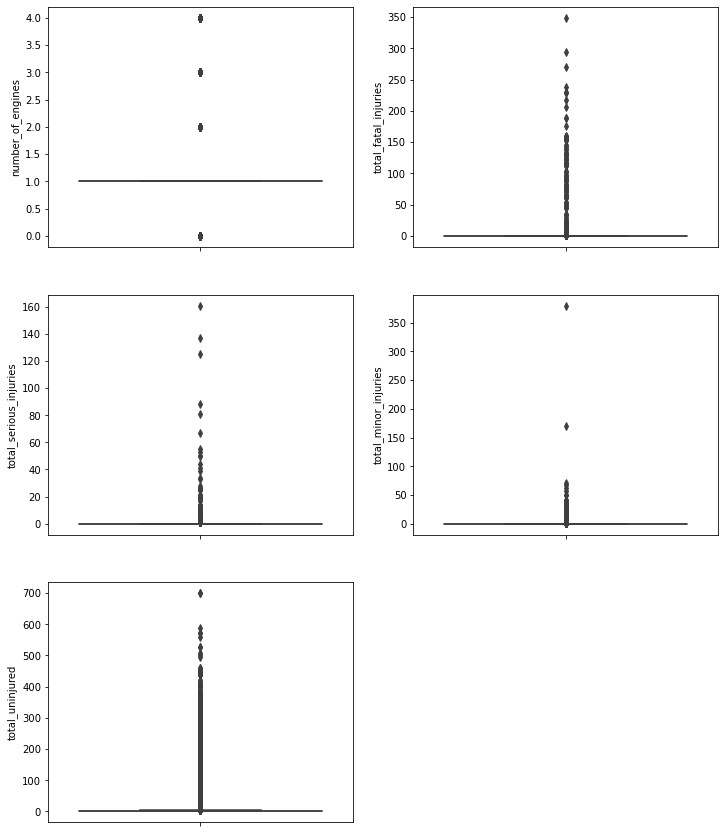

In [40]:
#calculate the number of fig to fit height 
grid=(numeric_df.shape[1]+1)//2 
#allocating each plot a height of 5
plt.figure(figsize=(12, grid * 5))

count=0
for col in numeric_df:
    count += 1 
    plt.subplot(grid,2,count)
    sns.boxplot(y=ntsb_df[col])  

In [41]:
for col in numeric_df:    
    q1= ntsb_main_df[col].quantile(0.25)
    q3 = ntsb_main_df[col].quantile(0.90) #because of large amount of outliers

    # calculating iqr
    iqr = q3 - q1

    #defining lower and upper bound
    upper= q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    # removing outliers
    ntsb_main_df_cleaned = ntsb_main_df[(ntsb_main_df[col] >= lower) & (ntsb_main_df[col] <= upper)]

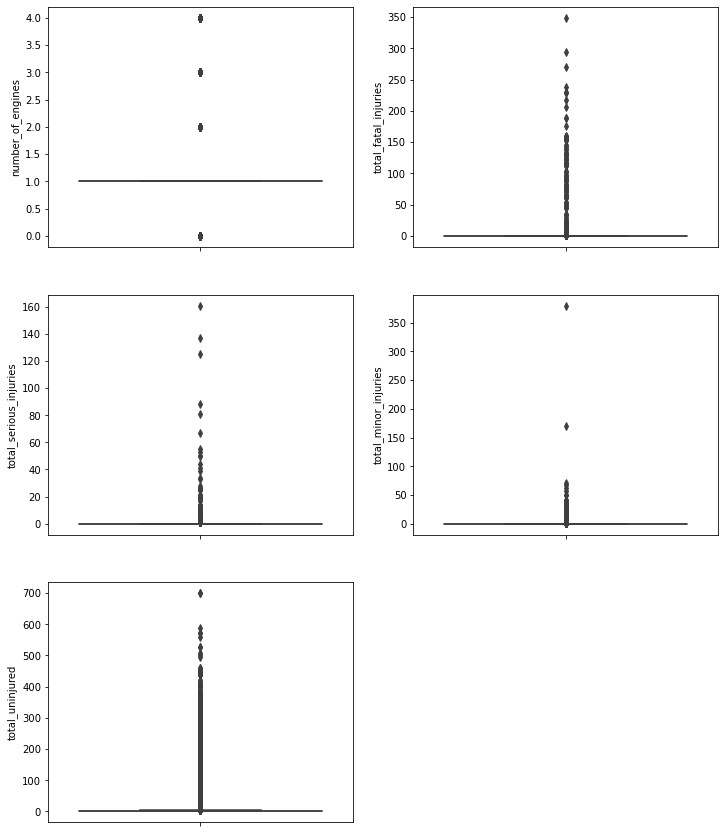

In [42]:
#allocating each plot a height of 5
plt.figure(figsize=(12, grid * 5))

count=0
for col in numeric_df:
    count += 1 
    plt.subplot(grid,2,count)
    sns.boxplot(y=ntsb_df[col])

In [43]:
#taking no of engine above 0
ntsb_df = ntsb_df[ntsb_df.number_of_engines > 0]

## Checking Duplicates

In [44]:
ntsb_df.duplicated()

1        False
2        False
6        False
7        False
8        False
         ...  
88858    False
88861    False
88865    False
88869    False
88877    False
Length: 50546, dtype: bool

In [45]:
ntsb_df.duplicated().sum()

0

In [46]:
ntsb_df.drop_duplicates(inplace=True)

In [47]:
#checking shape
ntsb_main_df.shape

(49852, 35)

In [124]:
#taking companies based on us
ntsb_main_df = ntsb_df[ntsb_df['country'] == 'United States']
ntsb_main_df['country'].unique()

array(['United States'], dtype=object)

In [125]:
#select columns to use
ntsb_main_df = ntsb_df[['event_id', 'investigation_type', 'accident_number', 'event_date',
       'location', 'country','injury_severity', 'aircraft_damage',
       'aircraft_category', 'registration_number', 'make', 'model',
       'amateur_built', 'number_of_engines', 'engine_type', 'far_description', 'purpose_of_flight',  
       'weather_condition', 'broad_phase_of_flight', 
       'publication_date', 'state','year','calculated_severity','town','total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured']]

In [126]:
ntsb_main_df.shape

(50546, 28)

In [127]:
ntsb_main_df.isna().sum()

event_id                      0
investigation_type            0
accident_number               0
event_date                    0
location                      0
country                       3
injury_severity               0
aircraft_damage             977
aircraft_category           782
registration_number          34
make                          0
model                         1
amateur_built                12
number_of_engines             0
engine_type                1077
far_description           36327
purpose_of_flight          1575
weather_condition           739
broad_phase_of_flight      9700
publication_date           9046
state                         0
year                          0
calculated_severity           0
town                          0
total_fatal_injuries       6219
total_serious_injuries     6801
total_minor_injuries       6384
total_uninjured            2714
dtype: int64

In [128]:
ntsb_main_df.dropna(inplace=True)

C:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [129]:
ntsb_main_df.shape

(2629, 28)

In [130]:
ntsb_main_df.isna().sum()

event_id                  0
investigation_type        0
accident_number           0
event_date                0
location                  0
country                   0
injury_severity           0
aircraft_damage           0
aircraft_category         0
registration_number       0
make                      0
model                     0
amateur_built             0
number_of_engines         0
engine_type               0
far_description           0
purpose_of_flight         0
weather_condition         0
broad_phase_of_flight     0
publication_date          0
state                     0
year                      0
calculated_severity       0
town                      0
total_fatal_injuries      0
total_serious_injuries    0
total_minor_injuries      0
total_uninjured           0
dtype: int64

In [131]:
ntsb_main_df.to_csv("ntsb_clean.csv", index=False)

# Explanatory Data Analysis

## Univariate Analysis

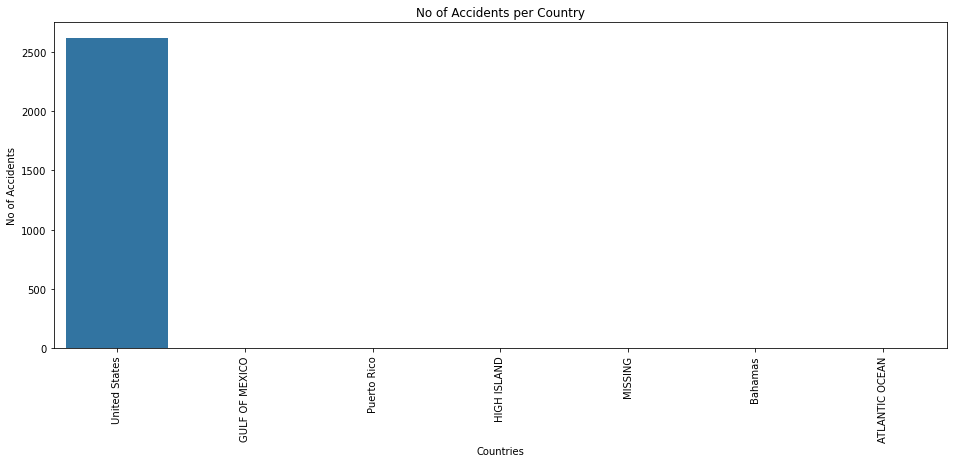

In [132]:
#plotting countries with no of accidents
countries_df = ntsb_main_df['country'].value_counts().reset_index().iloc[:30]
plt.figure(figsize=(16,6))
sns.barplot(x=countries_df['index'],y=countries_df['country'])
plt.xlabel('Countries')
plt.xticks(rotation=90)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Country")
plt.show()
#Observation: US is leading in accidents

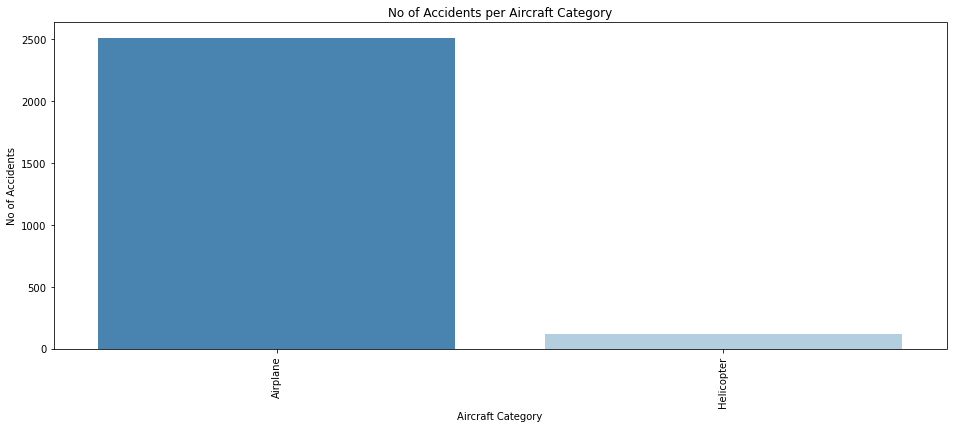

In [235]:
#plotting aircraft category with no of accidents
aircraft_category_df = ntsb_main_df['aircraft_category'].value_counts().reset_index().iloc[:30]
plt.figure(figsize=(16,6))
sns.barplot(x=aircraft_category_df['index'],y=aircraft_category_df['aircraft_category'],palette='Blues_r')
plt.xlabel('Aircraft Category')
plt.xticks(rotation=90)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Aircraft Category")
plt.show()
#Observation: airplane category has most accidents

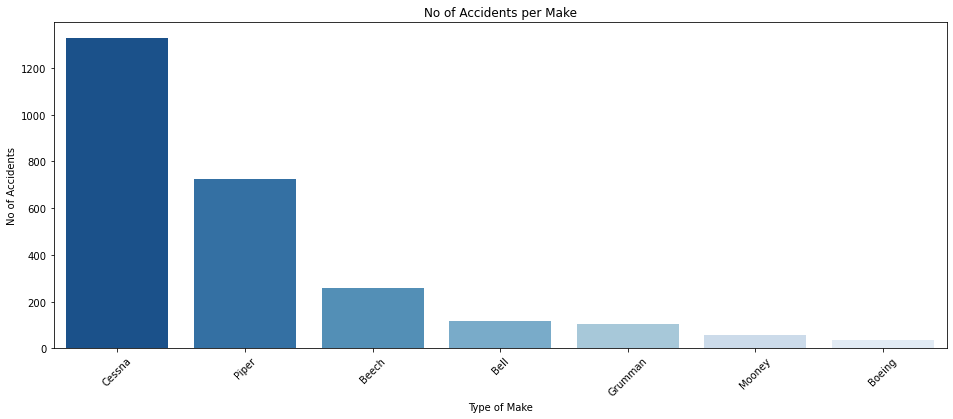

In [248]:
#plotting make with no of accidents
make_df = ntsb_main_df['make'].value_counts().reset_index()
plt.figure(figsize=(16,6))
sns.barplot(x=make_df['index'],y=make_df['make'],palette='Blues_r')
plt.xlabel('Type of Make')
plt.xticks(rotation=45)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Make")
plt.savefig('No_of_Accidents_per_Make.png')
plt.show()


<b>Observation:</b> Cessna has most accidents while Boeing has least

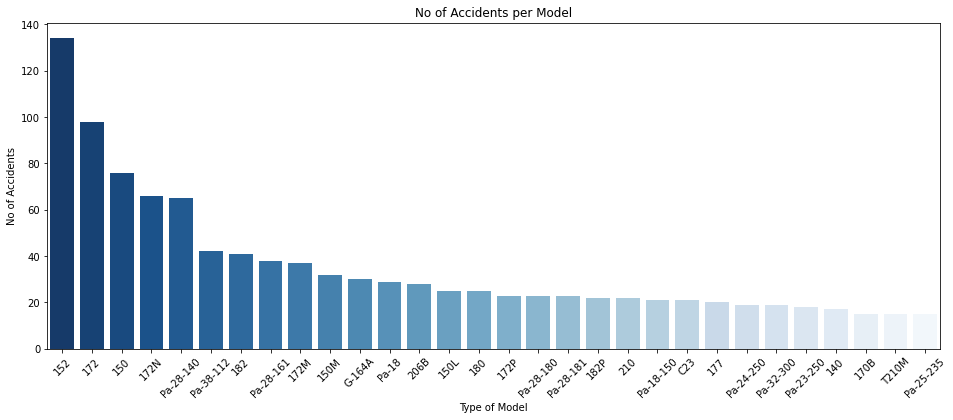

In [249]:
#plotting model with no of accidents
model_df = ntsb_main_df['model'].value_counts().reset_index().iloc[:30]
plt.figure(figsize=(16,6))
sns.barplot(x=model_df['index'],y=model_df['model'],palette='Blues_r')
plt.xlabel('Type of Model')
plt.xticks(rotation=45)
plt.ylabel('No of Accidents')
plt.title("No of Accidents per Model")
plt.savefig('No_of_Accidents_per_Model.png')
plt.show()

<b>Observation</b>: 152 is the most common model from all models

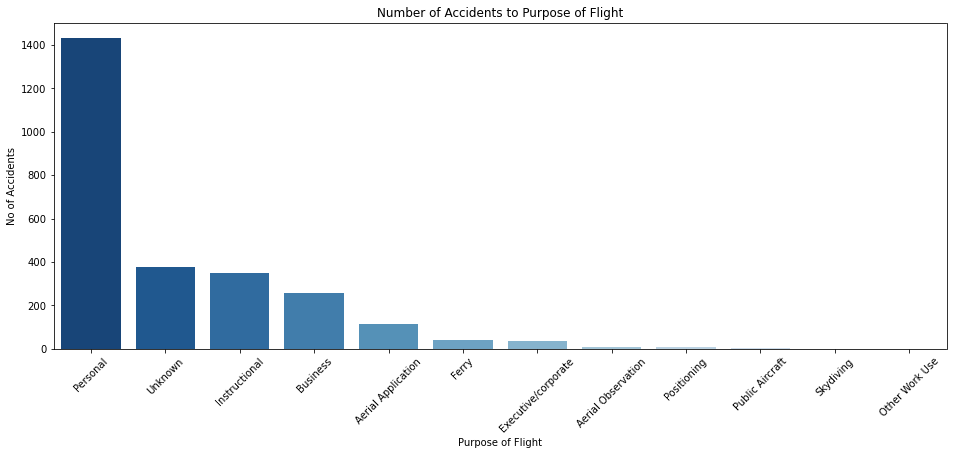

In [232]:
#comparison btw number of engines and purpose of flight 
plt.figure(figsize=(16,6))
purpose_count =  ntsb_main_df['purpose_of_flight'].value_counts()
sns.countplot(x=ntsb_main_df['purpose_of_flight'],order=purpose_count.index,palette='Blues_r')
plt.ylabel('No of Accidents')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.title("Number of Accidents to Purpose of Flight")
plt.show()

#Observation: Personal, Unknown and Instructionsl are  most common purpose flights

### Summary
The country to look into is United States and how top make and their respectively models and their aircraft category accessed to their potential risks.
And which specific purpose of flight has lower risk.

## Bivariate Analysis

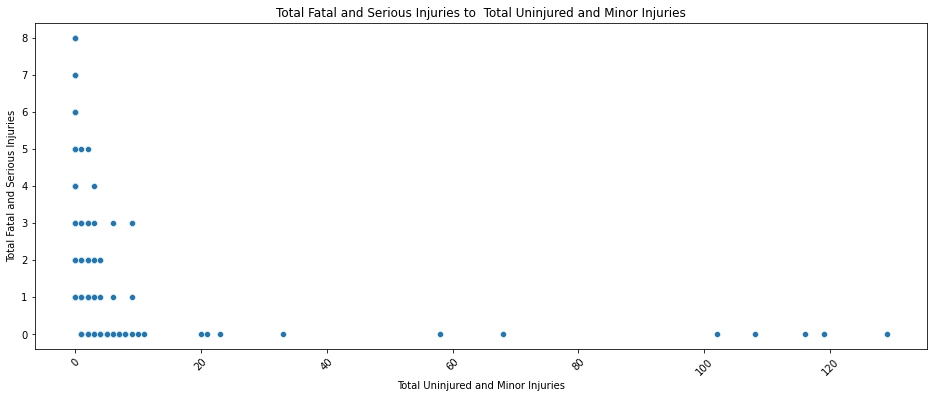

In [137]:
#type of make and country  
plt.figure(figsize=(16,6))
sns.scatterplot(x=ntsb_main_df['total_uninjured']+ntsb_main_df['total_minor_injuries'],y=ntsb_main_df['total_fatal_injuries']+ntsb_main_df['total_serious_injuries'])
plt.xlabel('Total Uninjured and Minor Injuries')
plt.xticks(rotation=45)
plt.ylabel('Total Fatal and Serious Injuries')
plt.title("Total Fatal and Serious Injuries to  Total Uninjured and Minor Injuries")
plt.show()

In [138]:
ntsb_main_df['total_fatal_injuries'].unique()

array([0., 1., 2., 3., 8., 4., 6., 5., 7.])

<AxesSubplot:>

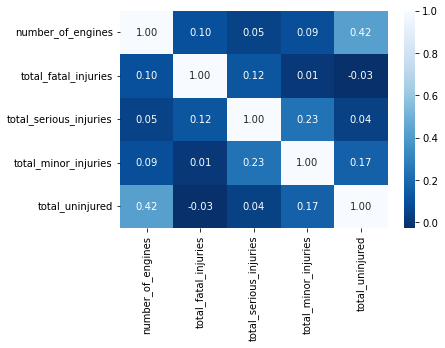

In [230]:
#correlation of numeric columns
corr = numeric_df.corr()
sns.heatmap(corr,annot=True,fmt=".2f", cmap="Blues_r")

<b>Observation:</b> <span><code>number_of_engines</code></span> and <span><code>'total_injured'</code></span> have positive correlation

In [206]:
year_df =  ntsb_main_df['year'].value_counts().reset_index()
year_df

,index,year
0,1982,2570
1,2007,44
2,2000,4
3,1995,2
4,1999,2
5,1990,1
6,1991,1
7,1993,1
8,1998,1
9,2001,1


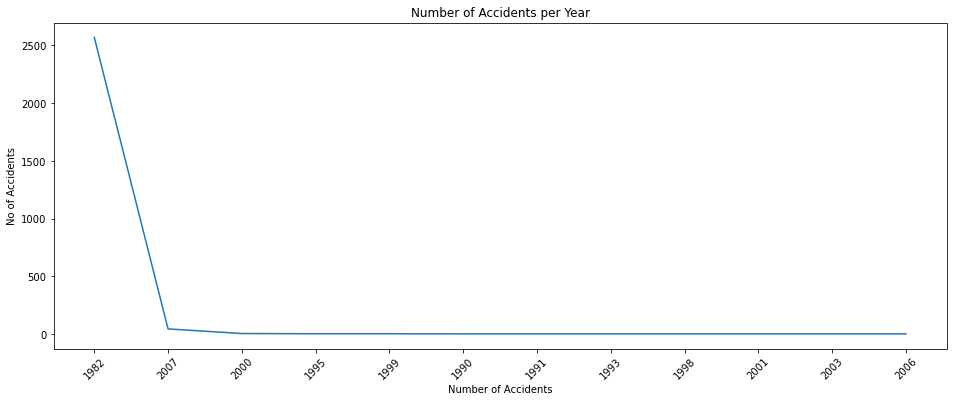

In [209]:
#comparison btw number of accidents and purpose of flight 
plt.figure(figsize=(16,6))
year_df =  ntsb_main_df['year'].value_counts().reset_index()
sns.lineplot(x=year_df['index'],y=year_df['year'])
plt.ylabel('No of Accidents')
plt.xticks(rotation=45)
plt.xlabel('Number of Accidents')
plt.title("Number of Accidents per Year")
plt.show()


<b>Observation:</b> There is be decline of accidents over the years

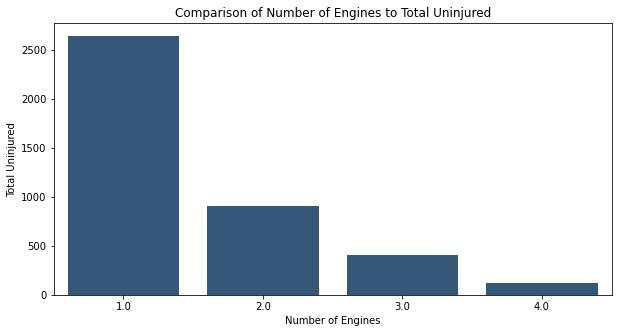

In [231]:
# Creating pivot table to aggregate total_uninjured by number_of_engines
engine_uninjured = ntsb_main_df.pivot_table(index='number_of_engines', values='total_uninjured', aggfunc='sum')

# Plotting data
plt.figure(figsize=(10, 5))
sns.barplot(x=engine_uninjured.index, y=engine_uninjured['total_uninjured'],color='#2a5783', ci=None) 
plt.xlabel('Number of Engines')
plt.ylabel('Total Uninjured')
plt.title('Comparison of Number of Engines to Total Uninjured');

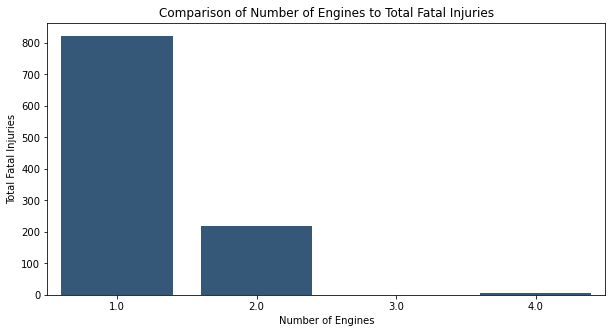

In [259]:
# Creating pivot table to aggregate total_uninjured by number_of_engines
engine_fatal = ntsb_main_df.pivot_table(index='number_of_engines', values='total_fatal_injuries', aggfunc='sum')

# Plotting data
plt.figure(figsize=(10, 5))
sns.barplot(x=engine_fatal.index, y=engine_fatal['total_fatal_injuries'], color='#2a5783', ci=None) 
plt.xlabel('Number of Engines')
plt.ylabel('Total Fatal Injuries')
plt.title('Comparison of Number of Engines to Total Fatal Injuries')
plt.savefig('No_of_Engines_to_Total_Fatal_Injuries.png')

<b>Observation:</b> Aircraft with <span><code>number_of_engines</code> </span>  = 1 is high risk 

## Multivariate Analysis

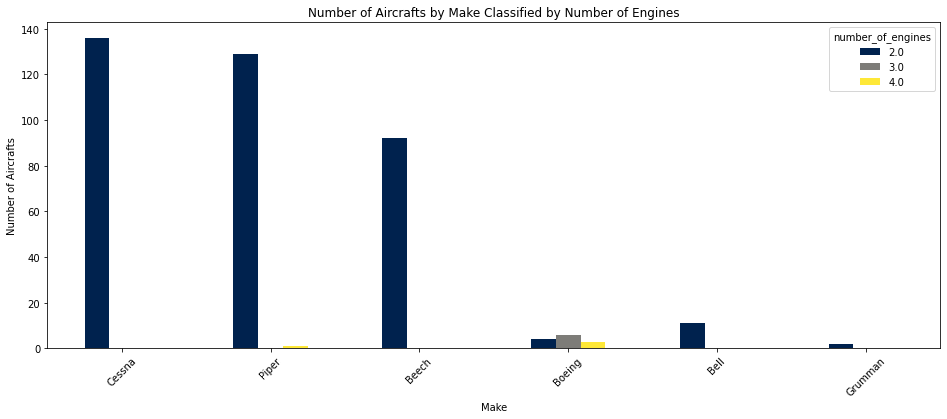

In [250]:
# Creating pivot table by count of number_of_engines by make
make_engine = ntsb_main_df[ ntsb_main_df.number_of_engines > 1].pivot_table(index='make', columns='number_of_engines', aggfunc='size', fill_value=0) 

#Creating total column for each row to help sort
make_engine['total'] = make_engine.sum(axis=1)  
make_engine = make_engine.sort_values('total', ascending=False) 
plt.figure(figsize=(16, 6))
make_engine.drop('total', axis=1).plot(kind='bar', stacked=False, ax=plt.gca(), colormap='cividis')

# Plotting the data
plt.ylabel('Number of Aircrafts')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.title("Number of Aircrafts by Make Classified by Number of Engines")
plt.savefig('Number_of_Aircrafts_per_Make.png')
plt.show()

<b>Observation:</b> Aircraft with <span><code>make</code> </span>  recommended is either Cessna, Piper or Beech

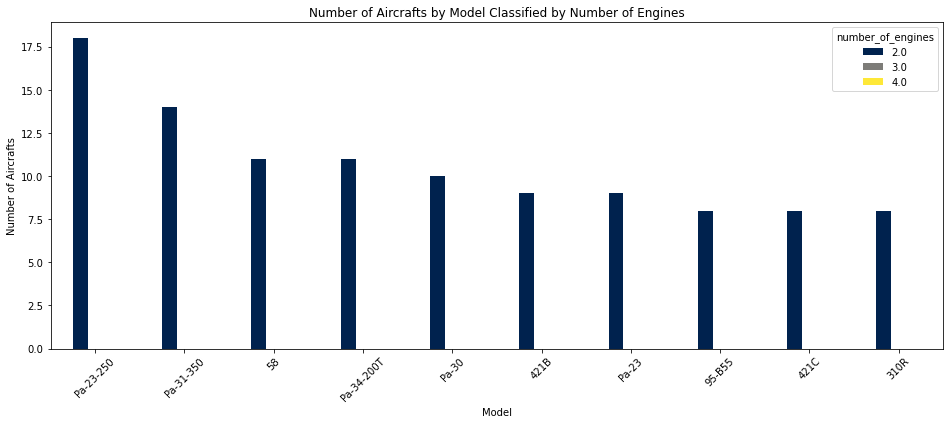

In [253]:
# Creating pivot table by count of number_of_engines by model
model_engine = ntsb_main_df[ ntsb_main_df.number_of_engines > 1].pivot_table(index='model', columns='number_of_engines', aggfunc='size', fill_value=0) 

#Creating total column for each row to help sort
model_engine['total'] = model_engine.sum(axis=1)  
model_engine = model_engine.sort_values('total', ascending=False).iloc[:10]
plt.figure(figsize=(16, 6))
model_engine.drop('total', axis=1).plot(kind='bar', stacked=False, ax=plt.gca(), colormap='cividis')

# Plotting the data
plt.ylabel('Number of Aircrafts')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.title("Number of Aircrafts by Model Classified by Number of Engines")
plt.show()

<b>Observation:</b> Aircraft <span><code>model</code> </span>  recommended is Pa=23-250, Pa-31-350 and 58

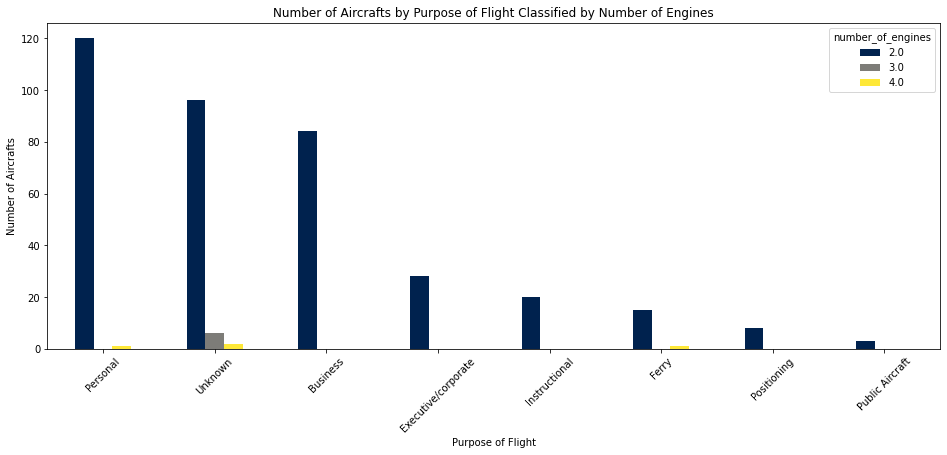

In [245]:
# Creating pivot table by count of number_of_engines by purpose_of_flight
model_engine = ntsb_main_df[ ntsb_main_df.number_of_engines > 1].pivot_table(index='purpose_of_flight', columns='number_of_engines', aggfunc='size', fill_value=0) 

#Creating total column for each row to help sort
model_engine['total'] = model_engine.sum(axis=1)  
model_engine = model_engine.sort_values('total', ascending=False).iloc[:10]
plt.figure(figsize=(16, 6))
model_engine.drop('total', axis=1).plot(kind='bar', stacked=False, ax=plt.gca(), colormap='cividis')

# Plotting the data
# Plotting the data
plt.ylabel('Number of Aircrafts')
plt.xlabel('Purpose of Flight')
plt.xticks(rotation=45)
plt.title("Number of Aircrafts by Purpose of Flight Classified by Number of Engines")
plt.show()

<b>Observation:</b> Aircraft for Personal, Unknown, Business dominates with <span><code>number_of_engines</code> </span> greater than 1

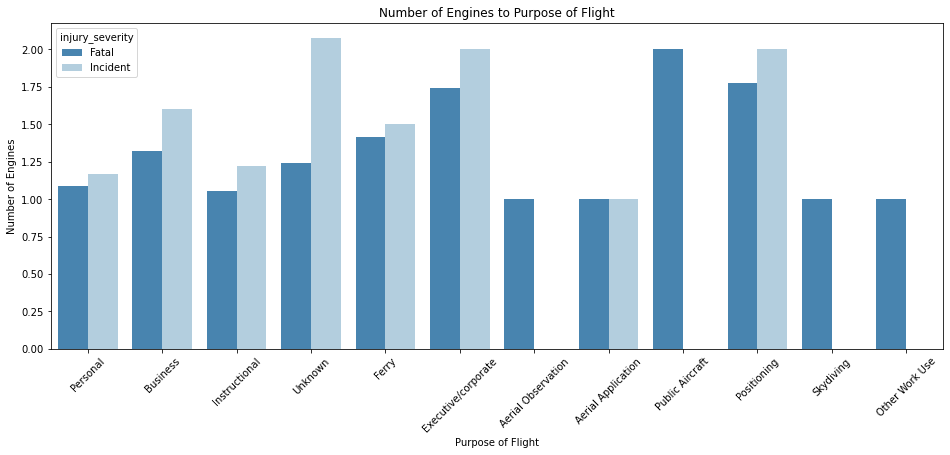

In [237]:
#comparison btw number of engines, purpose of flight and severity 
plt.figure(figsize=(16,6))
sns.barplot(y=ntsb_main_df['number_of_engines'],x=ntsb_main_df['purpose_of_flight'],hue=ntsb_main_df['injury_severity'],palette='Blues_r',ci=None)
plt.ylabel('Number of Engines')
plt.xticks(rotation=45)
plt.xlabel('Purpose of Flight')
plt.title("Number of Engines to Purpose of Flight")
plt.show()

<b>Observation:</b> Aircraft for Personal, Unknown, Business,Instructional, Ferry, Executive/Corporate,Positioning has <span><code>severity</code> </span> for incident greater than fatal

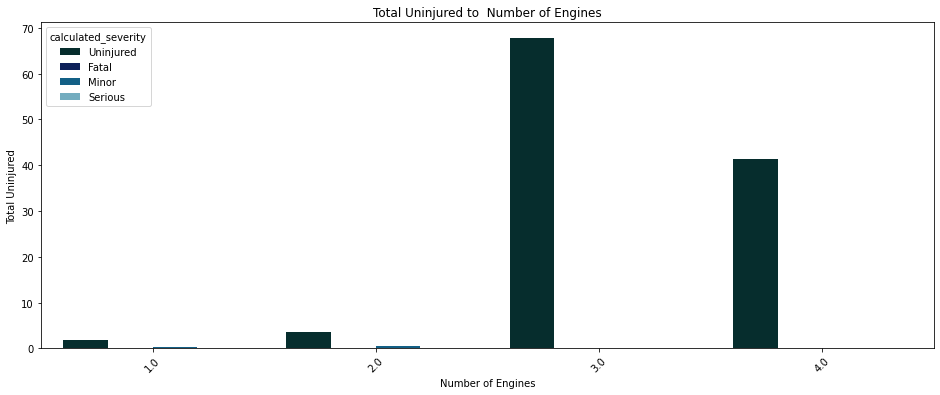

In [256]:
#comparison btw number of engines, total injured  and severity
plt.figure(figsize=(16,6))
sns.barplot(x=ntsb_main_df['number_of_engines'],y=ntsb_main_df['total_uninjured'], hue=ntsb_main_df['calculated_severity'],palette='ocean', ci=None)
plt.ylabel('Total Uninjured')
plt.xticks(rotation=45)
plt.xlabel('Number of Engines')
plt.title("Total Uninjured to  Number of Engines")
plt.savefig('Total_Uninjured_to_No_of_Engines.png')
plt.show()

<b>Observation:</b> Engines with 2 injuries caused less harm

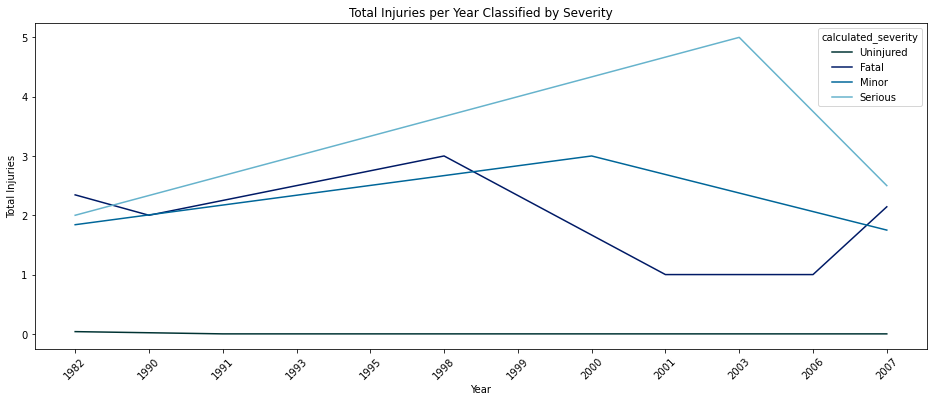

In [257]:
#comparison btw year, total injured and injury_severity  
plt.figure(figsize=(16,6))
total_injuries = ntsb_main_df['total_fatal_injuries']+ntsb_main_df['total_serious_injuries']+ ntsb_main_df['total_minor_injuries']
sns.lineplot(x=ntsb_main_df['year'],y=total_injuries, hue=ntsb_main_df['calculated_severity'],ci=None,palette='ocean')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title("Total Injuries per Year Classified by Severity")
plt.savefig('Total_Injuries_per_Year.png')
plt.show()

<b>Observation</b> There is increase of accidents over the years with severity getting worse

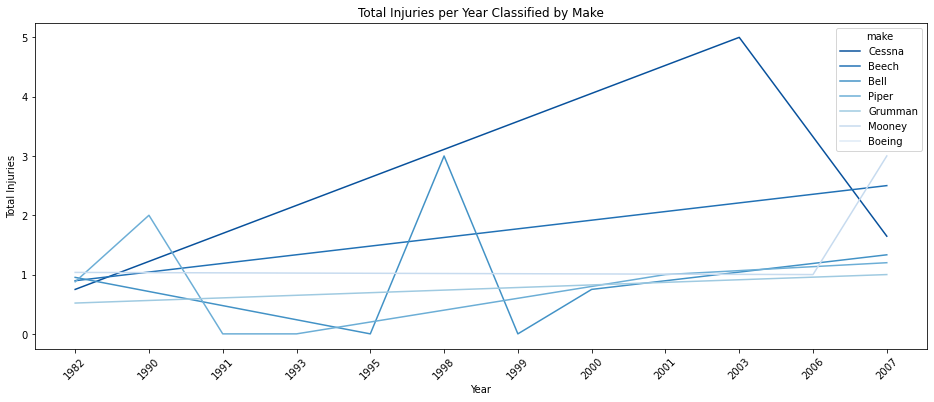

In [258]:
#comparison btw year, total injured and injury_severity  
plt.figure(figsize=(16,6))
total_injuries = ntsb_main_df['total_fatal_injuries']+ntsb_main_df['total_serious_injuries']+ ntsb_main_df['total_minor_injuries']
sns.lineplot(x=ntsb_main_df['year'],y=total_injuries, hue=ntsb_main_df['make'],palette='Blues_r',ci=None)
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title("Total Injuries per Year Classified by Make")
plt.savefig('Total_Injuries_per_Year_by_make.png')
plt.show()

<b>Observation:</b> There is increase of accidents for all the aircraft make. Cessna has however from around 2003 has experienced a decline.